In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('EM_load.csv') # EM load for pure heat conduction
df.keys(), df.shape

(Index(['Joule_heating', 'Points_0', 'Points_1', 'Points_2'], dtype='object'),
 (27935, 4))

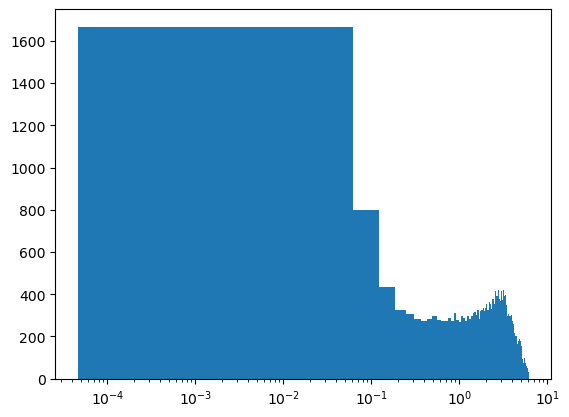

In [3]:
plt.hist(df['Joule_heating'], bins=100)
plt.xscale('log')
plt.show()

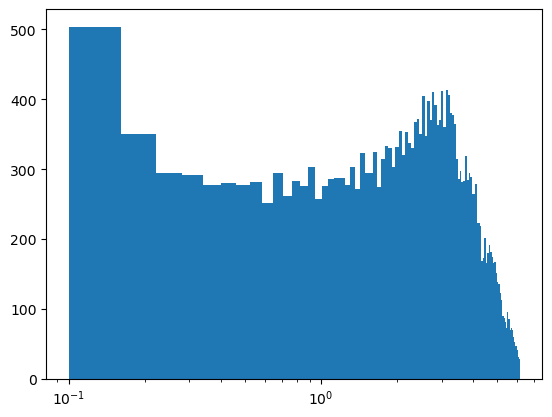

(25687, 4)

In [11]:
# Filter out the cells with Joule heating less than 1e-3
filtered_df = df[df['Joule_heating'] > 1e-1]
plt.hist(filtered_df['Joule_heating'], bins=100)
plt.xscale('log')
plt.show()
filtered_df.shape

In [10]:
filtered_df.to_csv('filtered_EM_Loads.csv', index=False)

In [13]:
df["Joule_heating"].describe(), filtered_df["Joule_heating"].describe()

(count    27935.000000
 mean         2.382976
 std          1.556873
 min          0.000046
 25%          1.058380
 50%          2.401860
 75%          3.524385
 max          6.129640
 Name: Joule_heating, dtype: float64,
 count    25687.000000
 mean         2.587726
 std          1.454288
 min          0.100068
 25%          1.416450
 50%          2.580510
 75%          3.641045
 max          6.129640
 Name: Joule_heating, dtype: float64)

# Linear interpolation

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [36]:
# Assume filtered_df is your DataFrame and it's already defined
filtered_df = filtered_df.rename(columns={'Points_0': 'X', 'Points_1': 'Y', 'Points_2': 'Z'})
X = filtered_df[['X', 'Y', 'Z']]
y = filtered_df['Joule_heating']

In [37]:
# Choose the degree of the polynomial. For quadratic and cubic terms, degree=3
degree = 5

# Create a pipeline that first transforms the features to polynomial features,
# and then fits a linear regression model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [38]:
# Fit the model
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [39]:
# Compute the R^2 score
r2_score = model.score(X, y)
r2_score

0.9836222520624684

In [41]:
# Assuming you have already fitted your model as before

# For scikit-learn versions 0.22 and later
feature_names = model.named_steps['polynomialfeatures'].get_feature_names_out(input_features=['X', 'Y', 'Z'])

# Get coefficients from the linear model
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

In [42]:
# Print out the polynomial terms and their coefficients
print("Intercept:", intercept)
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: {coef}")

Intercept: 6.978017791736729
1: 21.516977281505323
X: -3536.9510991371303
Y: -2247.52844266164
Z: -3009.5379557101382
X^2: 123639.84462181397
X Y: 321322.9304802402
X Z: 273821.27502949105
Y^2: 39693.009096262875
Y Z: 182265.93260486296
Z^2: 111756.20504266216
X^3: -1705106.8211148928
X^2 Y: -11595467.616203513
X^2 Z: -5377969.52459639
X Y^2: -7274843.9471622985
X Y Z: -18195588.411099073
X Z^2: -8418130.828109477
Y^3: 228068.15462490357
Y^2 Z: -2282084.0315432437
Y Z^2: -3929069.4330136254
Z^3: -1645960.685507223
X^4: 92820250.69548121
X^3 Y: -32993180.244342074
X^3 Z: -101899553.83851652
X^2 Y^2: 237292469.20600143
X^2 Y Z: 834672229.2423542
X^2 Z^2: -17220744.845361054
X Y^3: 35570728.1974535
X Y^2 Z: 357428783.91322553
X Y Z^2: -201013771.21243405
X Z^3: 423860152.7801994
Y^4: -3906661.9372496605
Y^3 Z: -52110837.13667488
Y^2 Z^2: 77401616.89228153
Y Z^3: 61835854.243192434
Z^4: -74363718.99028182
X^5: -559185289.5469693
X^4 Y: -78680125.03555767
X^4 Z: -1898492772.2463982
X^3 Y^2:

# Sparse Linear interpolation

In [43]:
from sklearn.linear_model import Lasso

In [69]:
# alpha is the regularization strength; larger values specify stronger regularization.
alpha = 0.0000001  # Example value, needs tuning
# Create a pipeline that first transforms the features to polynomial features,
# and then fits a Lasso regression model
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=20000))

In [70]:
# Fit the model
model.fit(X, y)  # X and y defined as before

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(alpha=1e-07, max_iter=20000))])

In [71]:
# Compute the R^2 score
r2_score = model.score(X, y)
r2_score

0.6403390817648125

In [72]:
# Assuming you have already fitted your model as before

# For scikit-learn versions 0.22 and later
feature_names = model.named_steps['polynomialfeatures'].get_feature_names_out(input_features=['X', 'Y', 'Z'])

# Get coefficients from the linear model
coefficients = model.named_steps['lasso'].coef_
intercept = model.named_steps['lasso'].intercept_

In [73]:
# Print out the polynomial terms and their coefficients
print("Intercept:", intercept)
for coef, name in zip(coefficients, feature_names):
    print(f"{name}: {coef}")

Intercept: -2.8205076554944988
1: 0.0
X: 480.0713501205895
Y: 280.73892759085953
Z: -505.7614452632182
X^2: -10276.103508716058
X Y: -11848.107927268124
X Z: -3108.1971420758105
Y^2: -4975.838379273534
Y Z: 13610.26981306527
Z^2: 19418.570161850697
X^3: -0.0
X^2 Y: 0.0
X^2 Z: -0.0
X Y^2: 223742.41742459673
X Y Z: -0.0
X Z^2: -0.0
Y^3: -0.0
Y^2 Z: -303454.4301386545
Y Z^2: 0.0
Z^3: 0.0
X^4: -0.0
X^3 Y: 0.0
X^3 Z: -0.0
X^2 Y^2: 0.0
X^2 Y Z: 0.0
X^2 Z^2: -0.0
X Y^3: 0.0
X Y^2 Z: 0.0
X Y Z^2: -0.0
X Z^3: 0.0
Y^4: 0.0
Y^3 Z: -0.0
Y^2 Z^2: -0.0
Y Z^3: 0.0
Z^4: 0.0
X^5: 0.0
X^4 Y: 0.0
X^4 Z: -0.0
X^3 Y^2: 0.0
X^3 Y Z: 0.0
X^3 Z^2: -0.0
X^2 Y^3: 0.0
X^2 Y^2 Z: 0.0
X^2 Y Z^2: 0.0
X^2 Z^3: -0.0
X Y^4: 0.0
X Y^3 Z: 0.0
X Y^2 Z^2: -0.0
X Y Z^3: -0.0
X Z^4: 0.0
Y^5: 0.0
Y^4 Z: -0.0
Y^3 Z^2: -0.0
Y^2 Z^3: -0.0
Y Z^4: 0.0
Z^5: 0.0
